# TMA4320 Introduksjon til vitenskapelige beregninger - 08.08.2022

##  En Runge-Kutta metode for å løse systemer av ordinære differensialligninger. 
## 1

I denne oppgaven skal du implementere den klassiske 4. ordens Runge-Kutta metoden for å løse et system av $m$ ikke-lineære differensialligninger:

$$
\mathbf{y}' = \mathbf{f}(x, \mathbf{y}), \qquad \mathbf{y}(t_0)=\mathbf{y}_0.
$$

over intervallet $[x_0, x_{end}]$.

Et steg med metoden fra $x_n$ til $x_{n+1}=x_n+h$ er gitt ved

$$
\begin{align*}
   {k}_1 &= {f}(x_n, {y}_n)\\ 
   {k}_2 &= {f}\left(x_n+\frac{h}{2}, {y}_n + \frac{h}{2}{k}_1\right) \\ 
   {k}_3 &= {f}\left(x_n+\frac{h}{2}, {y}_n + \frac{h}{2}{k}_2\right) \\ 
   {k}_4 &= {f}(x_n+h, {y}_n + h{k}_3) \\ 
   {y}_{n+1} &= {y}_n + \frac{h}{6}({k}_1 + 2{k}_2 + 2{k}_3 + {k}_4).
   \end{align*}
$$

Bruk konstant steglengde, dvs. $h=(x_{end}-x_0)/N_\text{steps}$, der $N_\text{steps}$ er antall steg. 

**Oppgave**

**(a)** Skriv en funksjon **RK4** som løser en gitt ODE, med metoden gitt over her. Ta utgangspunkt i cellen under. 

Nyttige funksjoner: 
* np.size
* np.linspace  

*Svaret på dette delspørsmålet er korrekt utfylt kode i følgende celle*

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def RK4(f, x0, xend, y0, Nsteps):
    '''
    Løser en ordinær differensialligning dy=f(x,y) med RK4-metoden.
    
    Input: 
    f:  En funksjon f(x,y) som definerer differensialligningen. 
        Input: x (skalar), y (numpy array). 
        Output: dy (numpy array) (se neste punkt)
    x0, xend: Integrasjonsintervallet.
    y0: startverdi (numpy array).
    Nsteps: antall steg som skal tas. 
    
    Output:
    T: tidspunktene [t_0,t_1,...,t_Nsteps], (numpy array).
    Y: en tilnærmelse til løsningen i hvert tidspunkt 
       (2d numpy array, dimensjon (Nsteps+1,m)), der m er antall ligninger i systemet.
    '''

    m = np.size(y0)
    h = (xend - x0) / Nsteps
    X = np.linspace(x0, xend, Nsteps+1)
    Y = np.zeros((Nsteps+1, m))
    Y[0,:] = y0

    for n in range(Nsteps):
        xn = X[n]
        yn = Y[n,:]
        k1 = f(xn,yn)
        k2 = f(xn + h/2, yn + h/2*k1)
        k3 = f(xn + h/2, yn + h/2*k2)
        k4 = f(xn + h, yn + h*k3)
        Y[n+1,:] = yn + h/6*(k1 + 2*k2 + 2*k3 + k4)

    return X, Y

**(b)**

Bruk koden over til å løse differensialligningen
$$
\begin{align*}
    y_1' &= -k y_1 y_2, & y_1(0) &= 0.95, \\
    y_2' &= ky_1y_2 - ry_2, & y_2(0) &= 0.05, \\
    y_3' &= ry_2, & y_3(0) &= 0.0,
\end{align*}
$$
med konstantene $k=0.5$ og $r=0.1$. 
Løs ligningene over intervallet $[0,50]$ og  
bruk $Nsteps=1000$, og lag et plott av løsningene. 

*Svaret på denne deloppgaven er korrekt utfylt kode i cellen under.*

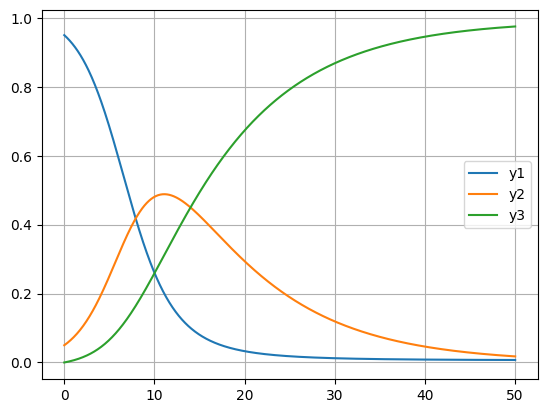

In [8]:
def f(x, y):
    '''
    Definer ligningen y'=f(x,y)
    Input: x (skalar), y (np.array)
    Output: dy (np.array)
    '''
    k = 1/2
    r = 0.1
    dy = np.array([-k*y[0]*y[1], k*y[0]*y[1]-r*y[1], r*y[1]])

    return dy

Nsteps = 1000
x0, xend = 0, 50
y0 = np.array([0.95, 0.05, 0])

X, Y = RK4(f, x0, xend, y0, Nsteps)
plt.plot(X,Y[:,0], label="y1")
plt.plot(X,Y[:,1], label="y2")
plt.plot(X,Y[:,2], label="y3")
plt.grid()
plt.legend()
plt.show()